In [1]:
import matplotlib.pyplot as plt

from synchronization import plots
from synchronization import experiments
from synchronization import constants

import seaborn as sns
sns.set(font_scale=1.2)
sns.set_style("white")
sns.set_style("ticks")

%load_ext autoreload
%autoreload 2

/Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/models
/Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/plots_out


## Effect of Mean on the Frequency

Parameter range: $0.5$ steps starting from $0$ and stopping at $4.5$.

The mean or strength of the noise is positively correlated with the dominant frequency of the network.
I.e. we see for each $0.5$ increase in the mean a rise in the frequency band.

Explanation: this result is not surprising as an increase in the mean leads to higher membrane voltage in the single neurons.
This results in faster crossing of the membrane threshold and stronger drive in the network.

TODO: verify explanations 

### Bandpower Heat Map 

We can see here that the higher that an increase in the mean leads to an increase in the gamma bandpower.

* With a mean around 0-1 mv the PING rhythm collapses and the gamma rhythm breaks apart.
* An increase in sigma / variance leads to a lower amplitude when the mean is fixed. 

Thus, a constant and strong external drive enforces the PING rhythm while variable and weak input deteriorates the gamma signal.

In [2]:
def create_plots(models, mean, sigma):
    model = [model for model in models if model["params"]["ou_mu"]["ou_sigma"] == sigma and model["params"]["ou_mu"]["ou_mean"] == mean][0]
    
    fig, ax = plots.raster(model, f"Raster for mean = {mean} and sigma = {sigma}")
    fig.savefig(f"{constants.PLOTS_PATH}/noise_experiment/raster_{mean}_{sigma}")
    
    fig, ax = plots.psd(title="", model=model)
    fig.savefig(f"{constants.PLOTS_PATH}/noise_experiment/psd_{mean}_{sigma}")
    
    fig, ax = plots.lfp(title=f"LFP for mean = {mean} and sigma = {sigma}", model=model)
    fig.savefig(f"{constants.PLOTS_PATH}/noise_experiment/summed_voltage_{mean}_{sigma}")

In [3]:
models = experiments.NoiseExperiment.load(lambda x: x["params"]["ou_mu"]["ou_tau"] == 1)

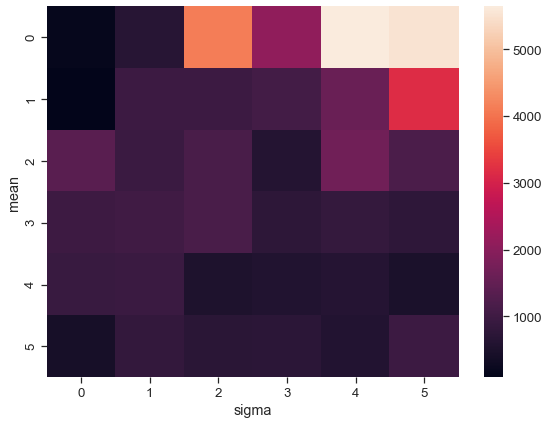

In [4]:
fig, ax, df = plots.heat_map(models, metric='bandpower')
plt.tight_layout()
fig.savefig(f"{constants.PLOTS_PATH}/noise_experiment/heatmap_mean_sigma_amplitude")

Below are plots of selected parameter configurations displayed.

Generate PSD plot ...
Generate PSD plot ...
Generate PSD plot ...
Generate PSD plot ...


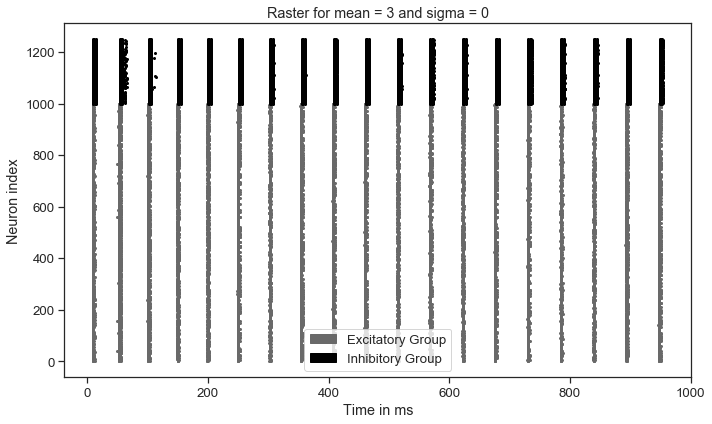

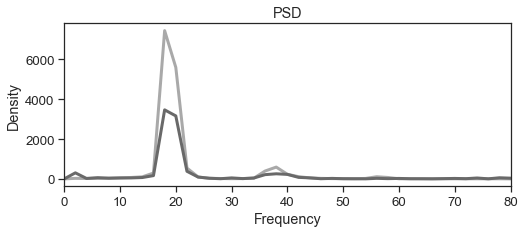

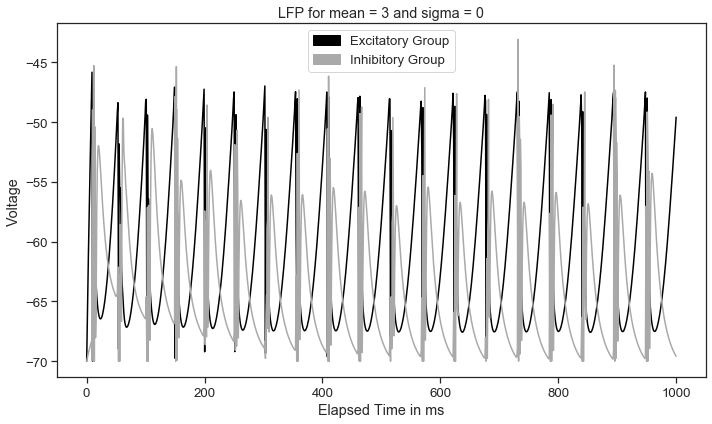

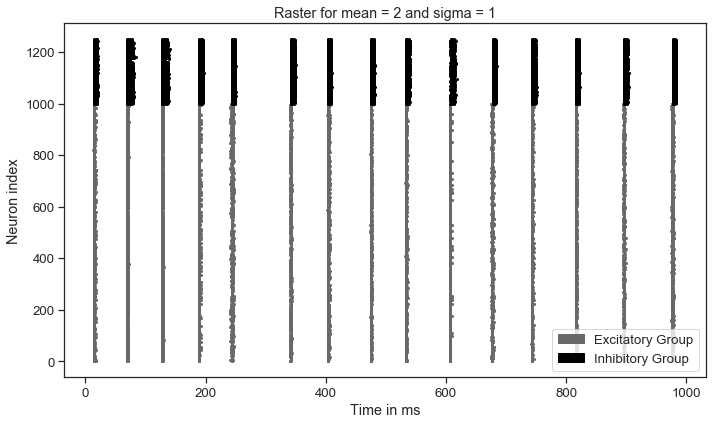

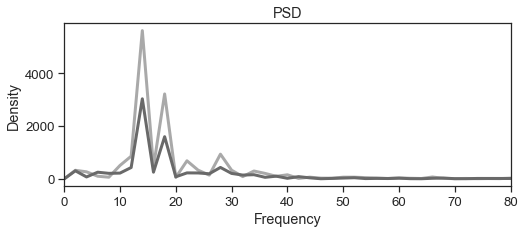

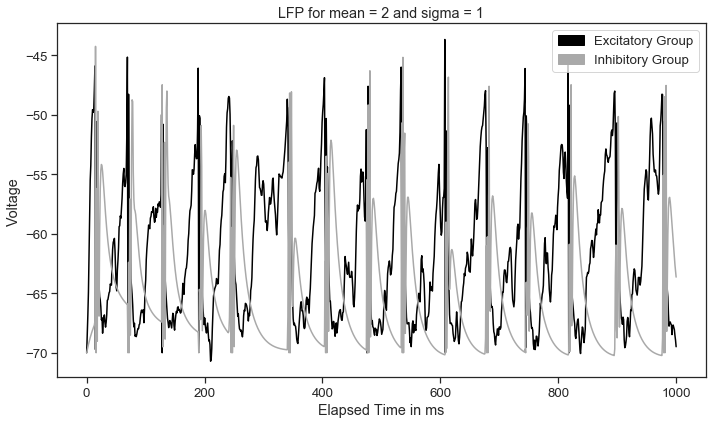

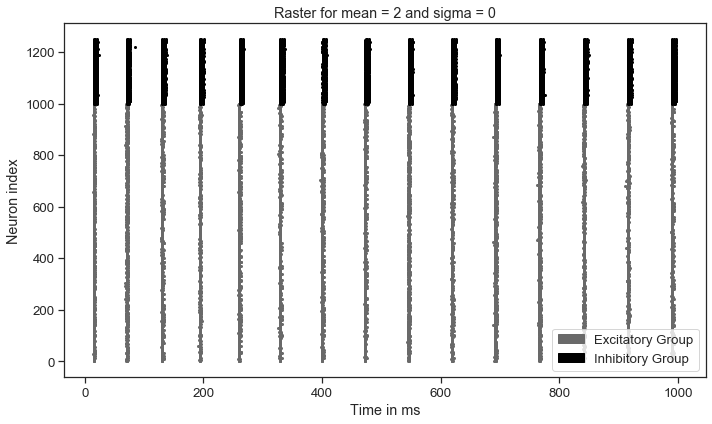

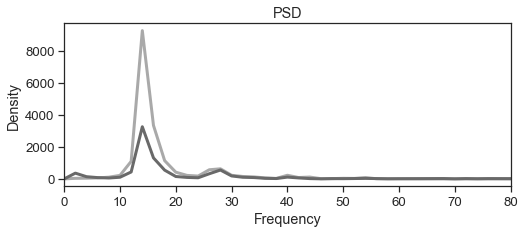

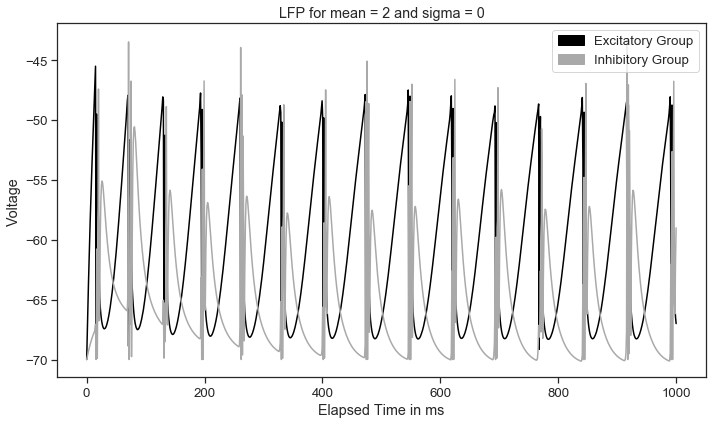

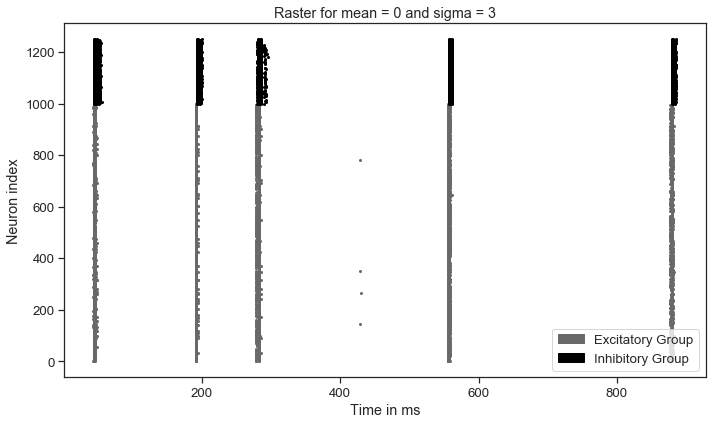

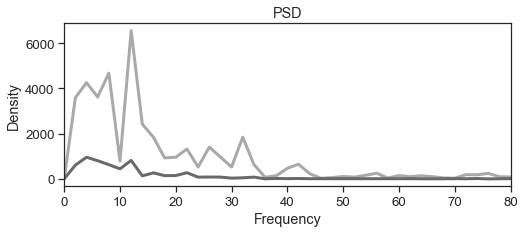

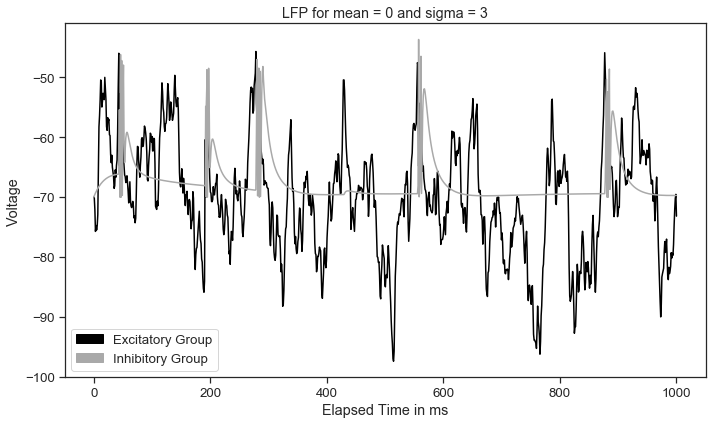

In [5]:
# really bad
mean, sigma = 3, 0
create_plots(models, mean, sigma)

# bad
mean, sigma = 2, 1
create_plots(models, mean, sigma)

# better
mean, sigma = 2, 0
create_plots(models, mean, sigma)

# best
mean, sigma = 0, 3
create_plots(models, mean, sigma)

### Frequency Heat Map

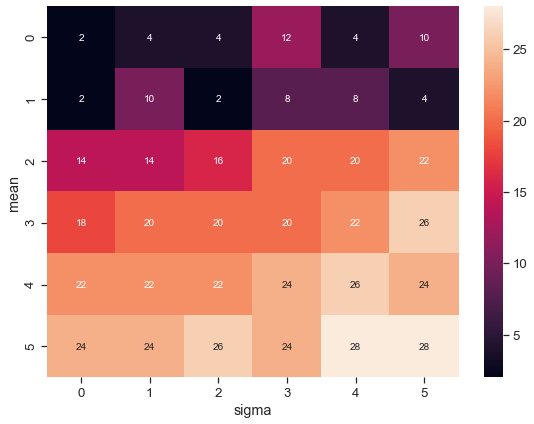

In [6]:
fig, ax, df = plots.heat_map(models, metric='freq', annot=True, fmt="d")
plt.tight_layout()

fig.savefig(f"{constants.PLOTS_PATH}/noise_experiment/heatmap_mean_sigma_freq")

### Impact of Correlation parameter $\tau$

Observations:
* No significant changes when over different correlation strengths if the variance stays low. 
* If variance is increased the PING rhythm gets weaker


In [7]:
models = experiments.NoiseExperiment.load(lambda x: x["params"]["ou_mu"]["ou_mean"] == 5)

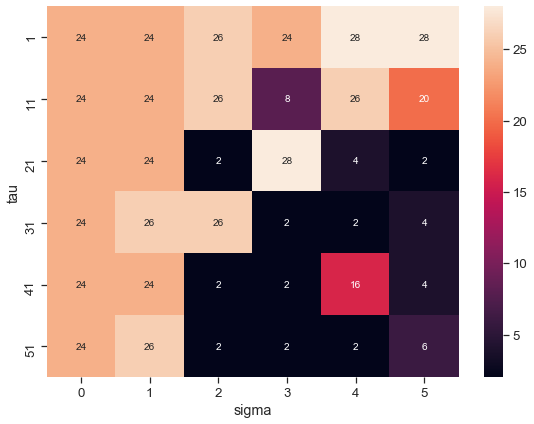

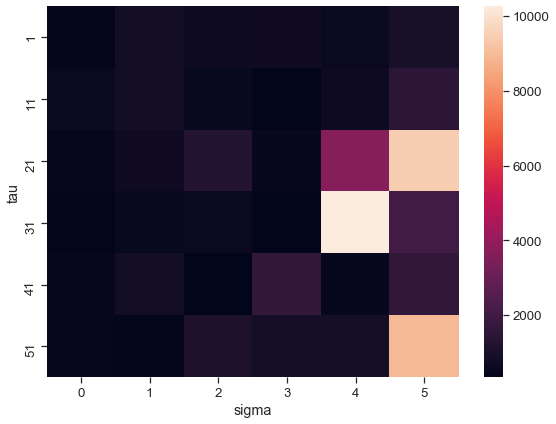

In [8]:
fig, ax, df = plots.heat_map(models, x='tau', metric='freq', annot=True, fmt="d")
plt.tight_layout()

fig.savefig(f"{constants.PLOTS_PATH}/noise_experiment/heatmap_correlation_1")

fig, ax, df = plots.heat_map(models, x='tau', metric='bandpower')
plt.tight_layout()

fig.savefig(f"{constants.PLOTS_PATH}/noise_experiment/heatmap_correlation_2")

In [9]:
# clean up memory
models = None


